# Лабораторная работа 2

#### ФИО: Кривов Кирилл Иванович
#### Группа: 8О-308Б

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.5)
plt.rc("figure", figsize=(15, 5))

pd.options.display.max_columns = 100

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [3]:
train_file = "./train.csv"
test_file = "./test.csv"
submission_file = './submission.csv'
auxiliary_file = './tmp.txt'

In [4]:
df = pd.read_csv(train_file)

In [5]:
X = df.iloc[:, 1:-1]
y = df['Cover_Type']

Посмотрим на основные статистические величины для каждого столбца в каждом типе покрытия.

In [8]:
grouped = df.iloc[:, 1:].groupby('Cover_Type')

In [11]:
min_df = grouped.min()
med_df = grouped.median()
mean_df = grouped.mean()
max_df = grouped.max()

/home/forlabs/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


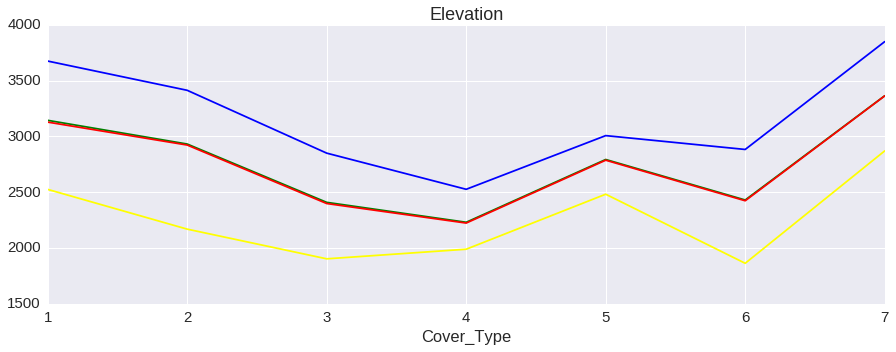

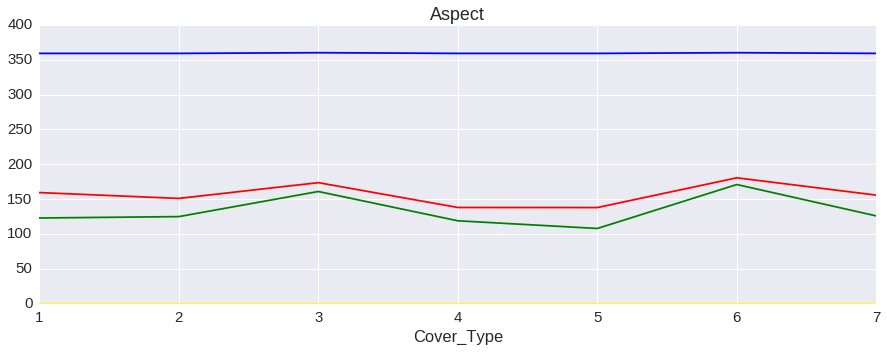

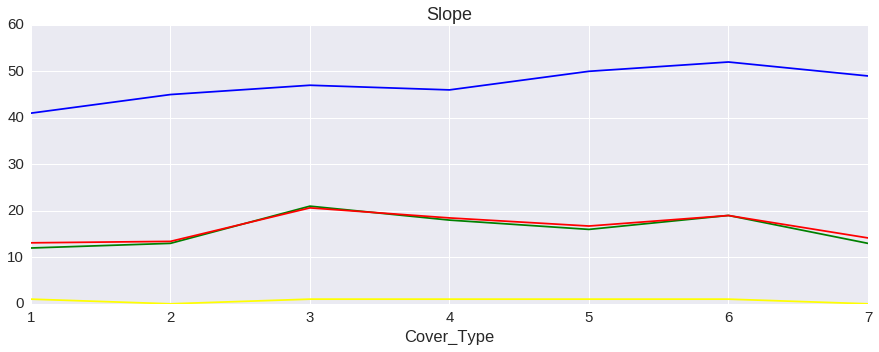

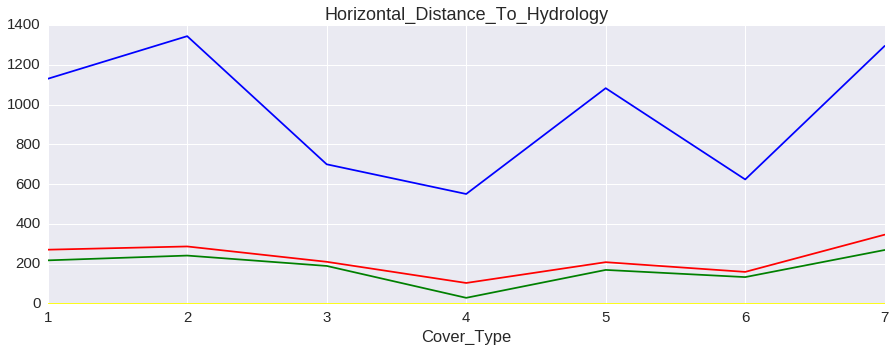

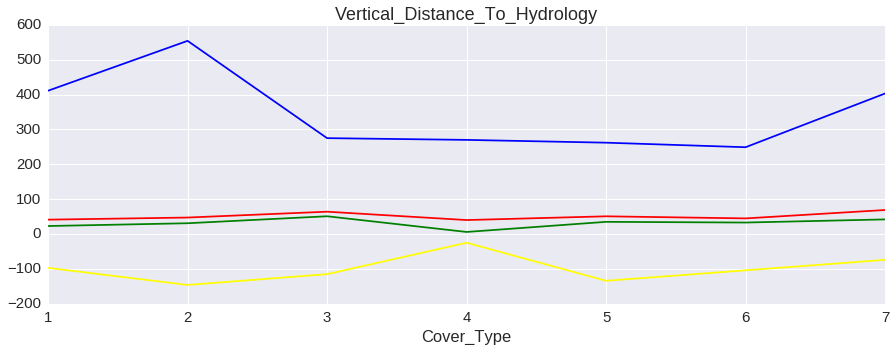

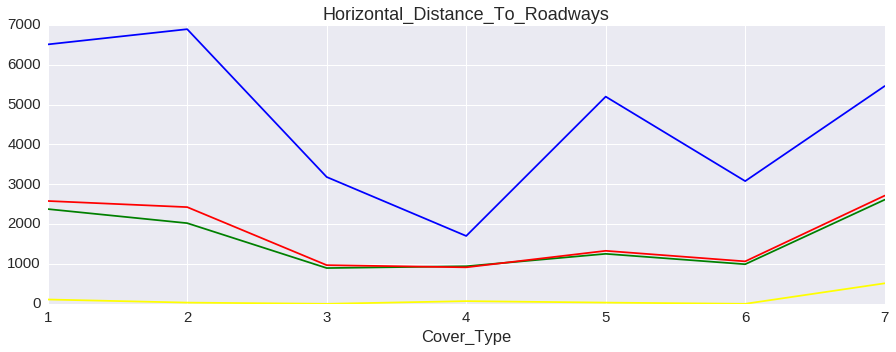

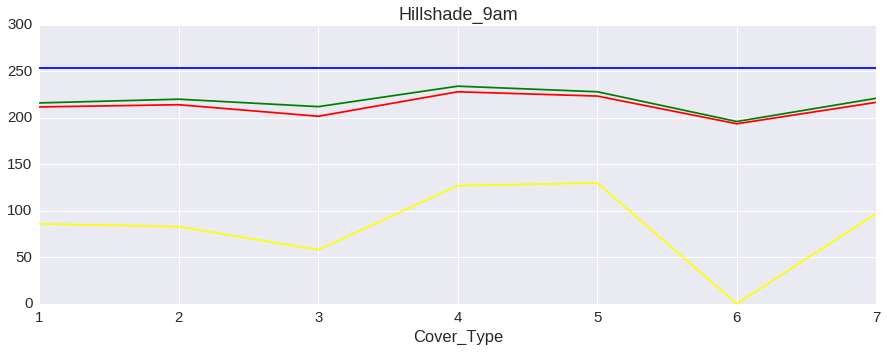

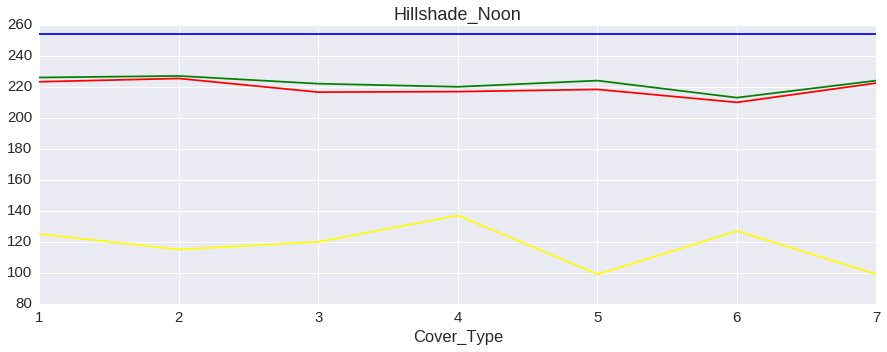

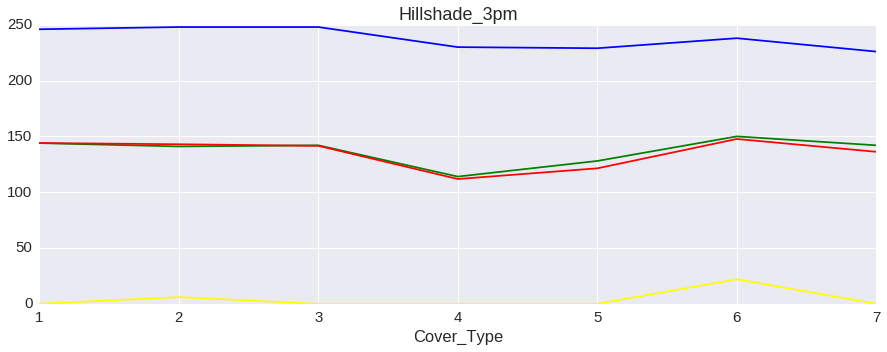

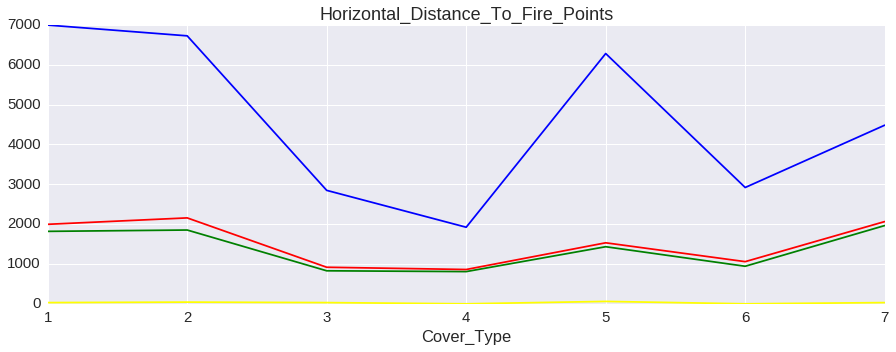

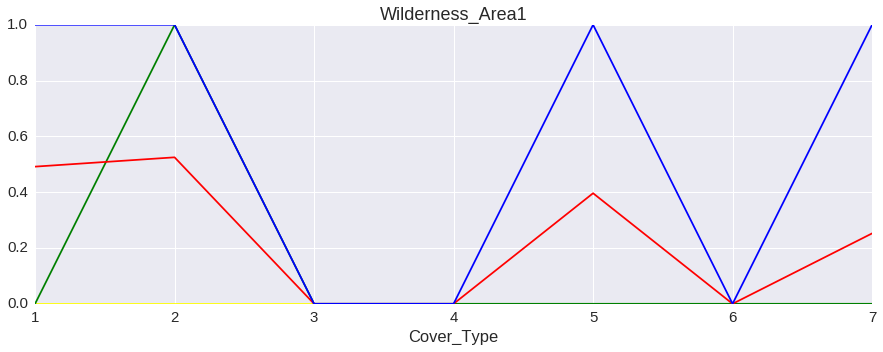

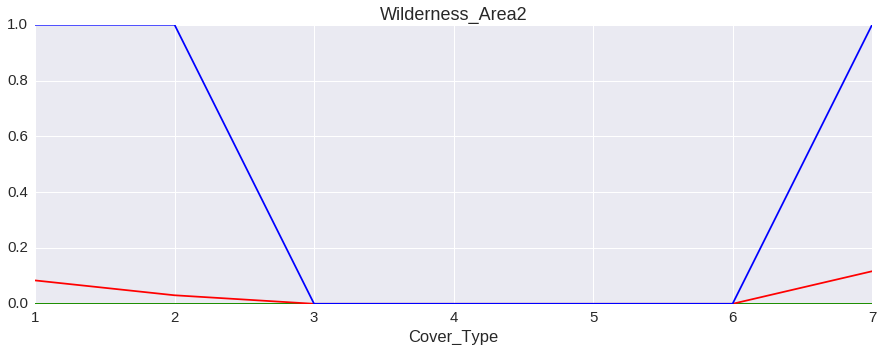

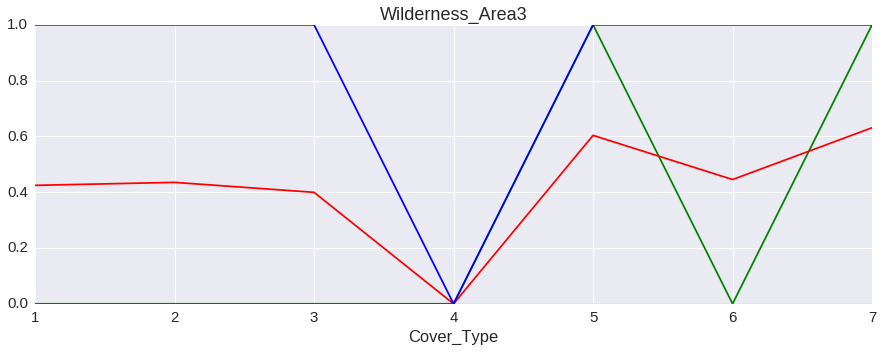

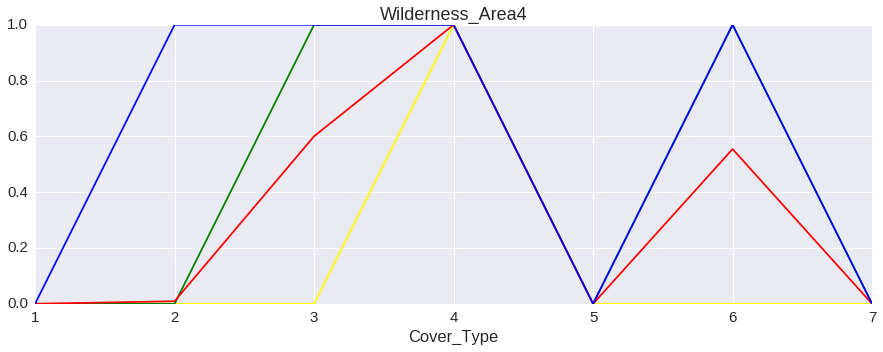

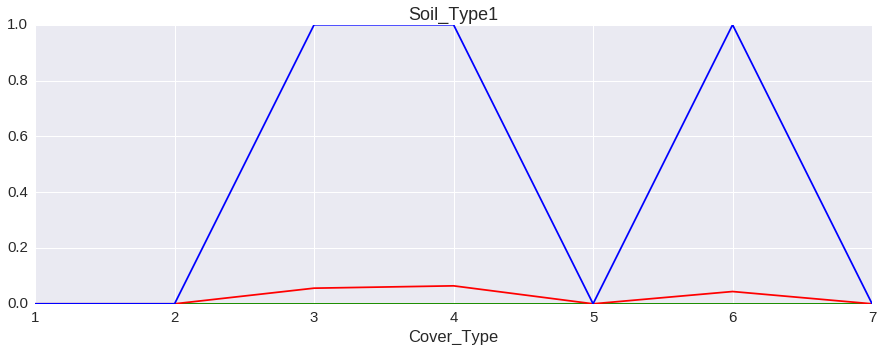

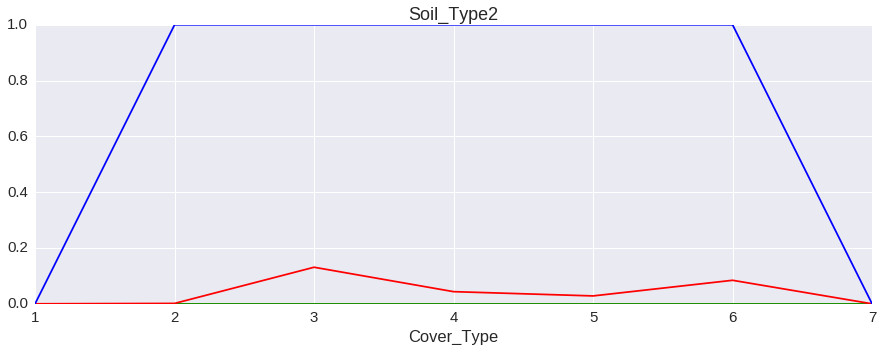

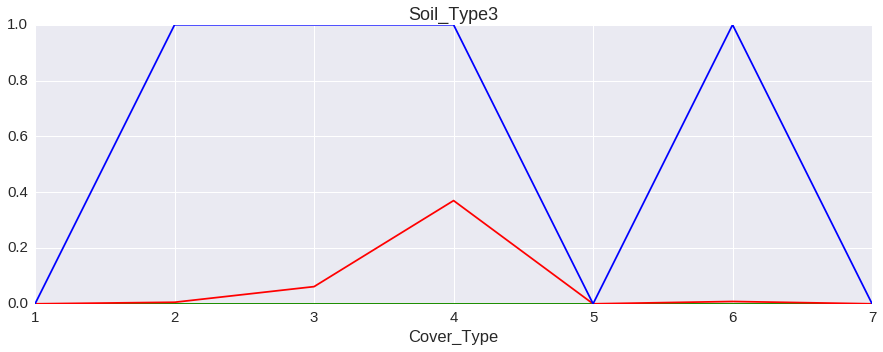

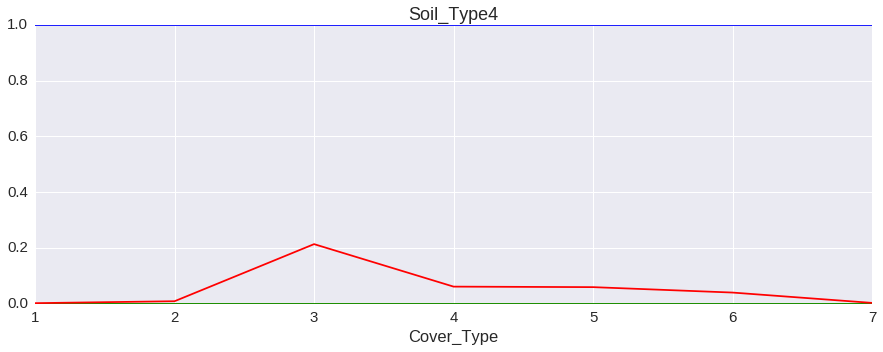

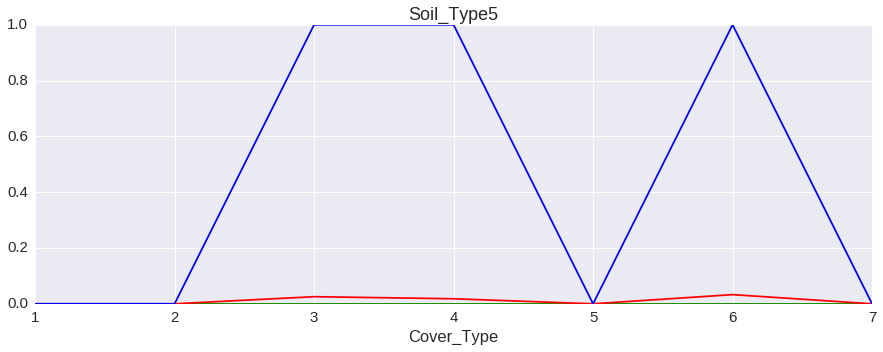

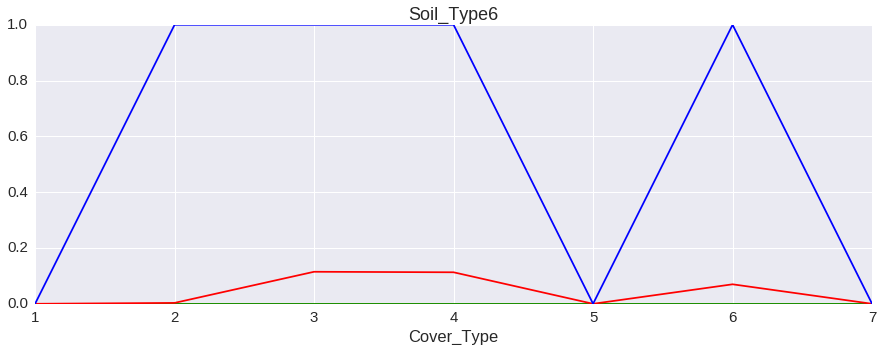

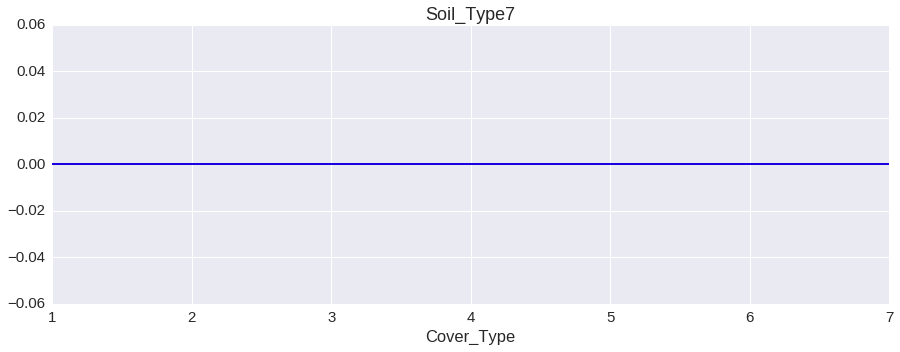

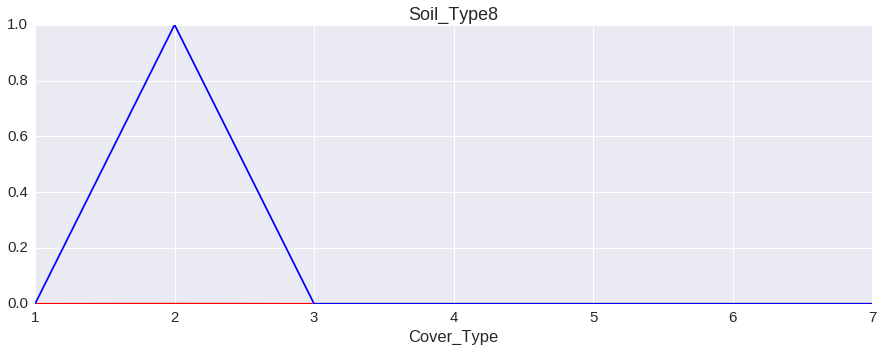

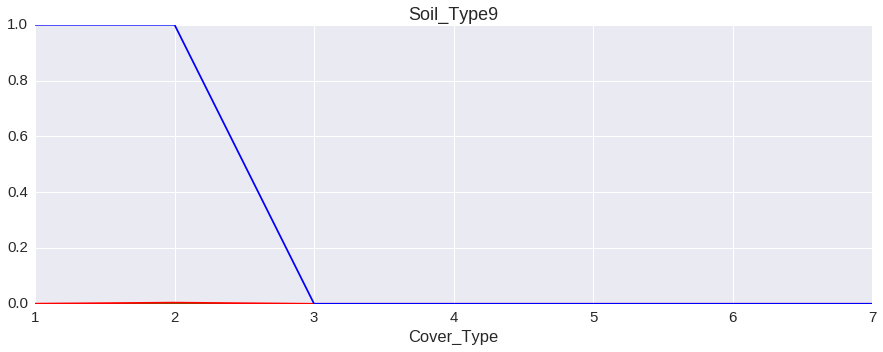

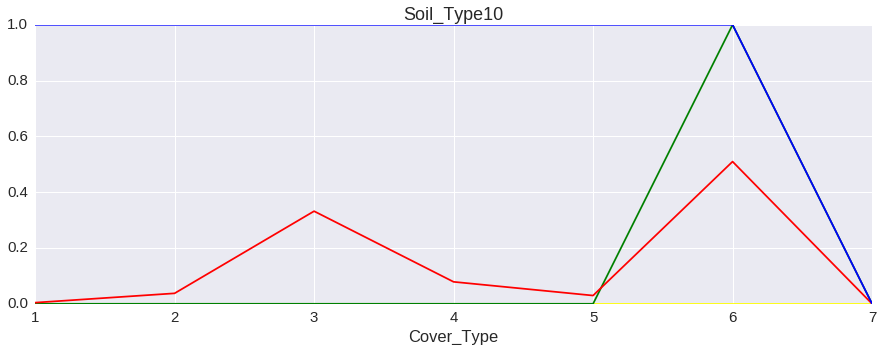

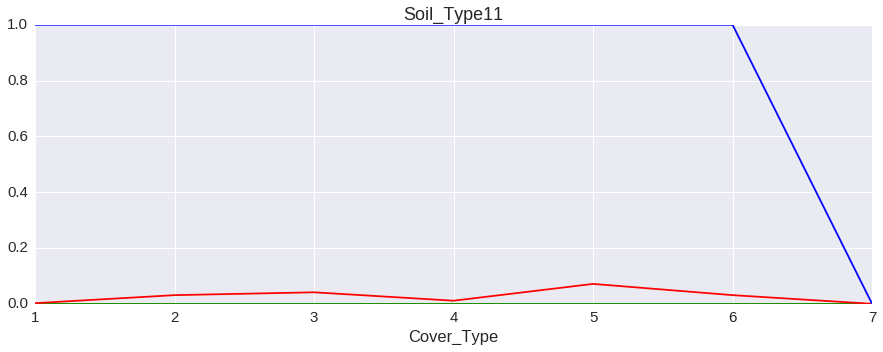

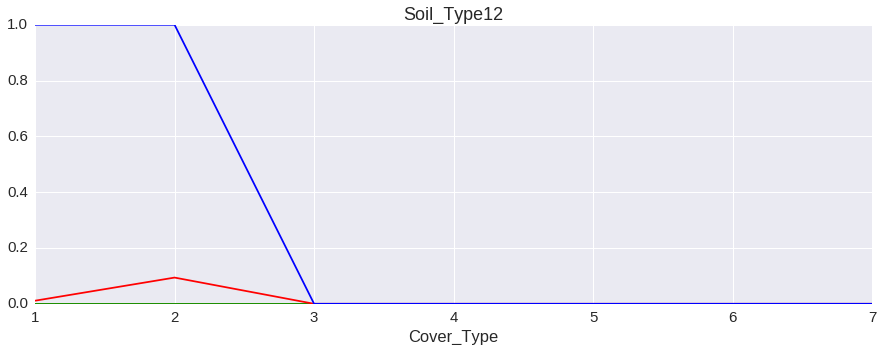

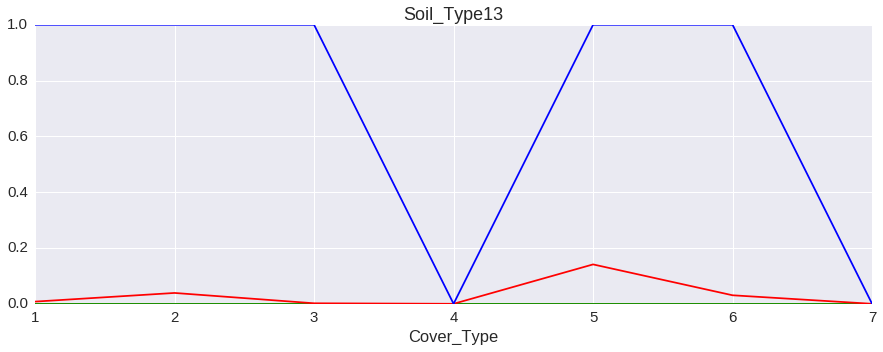

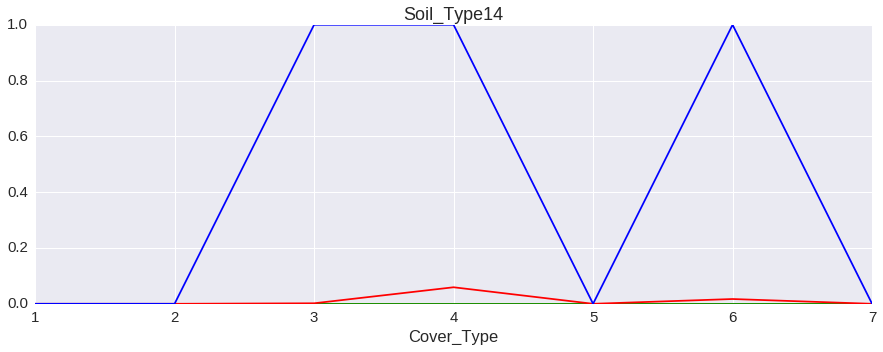

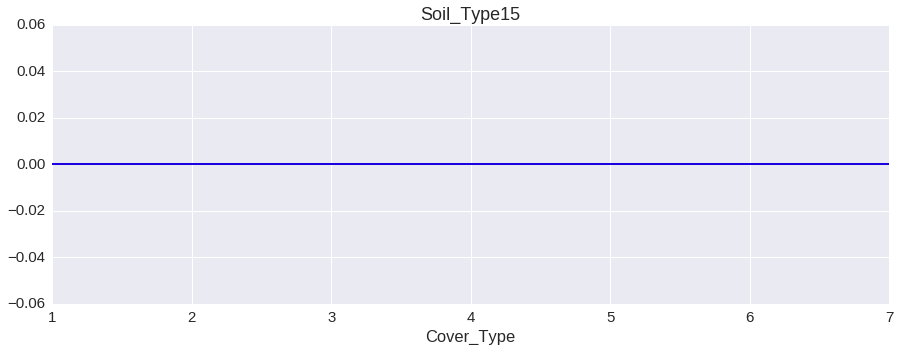

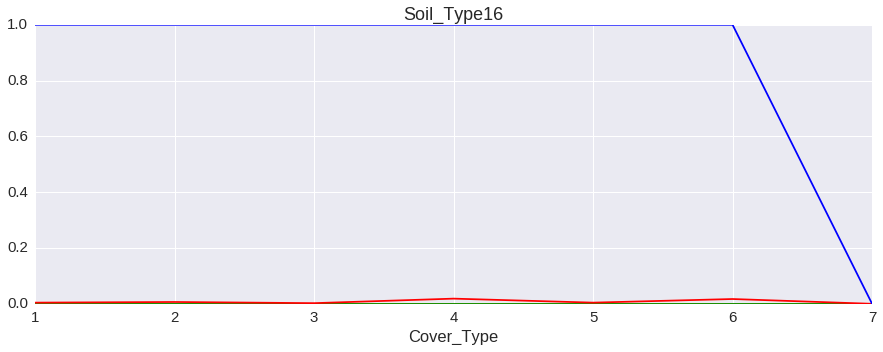

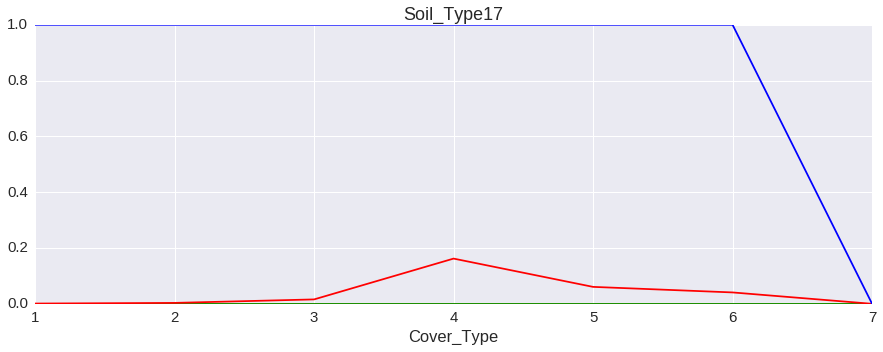

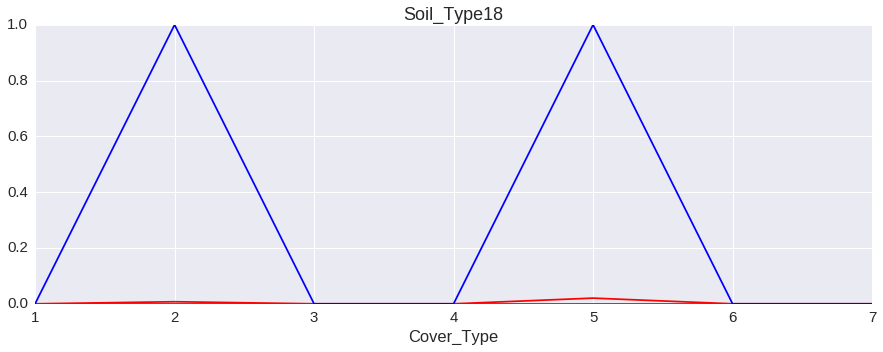

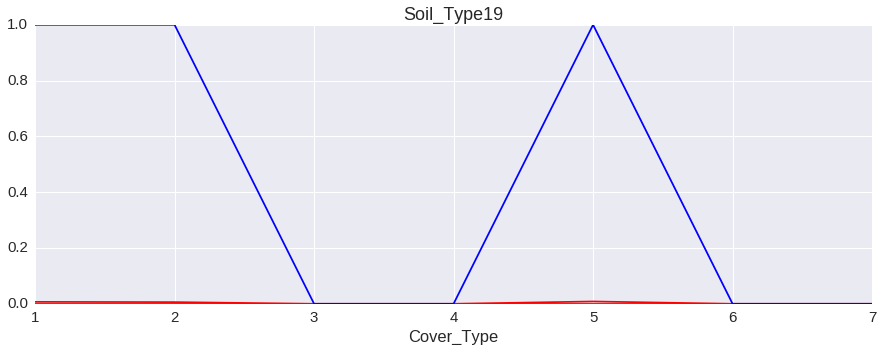

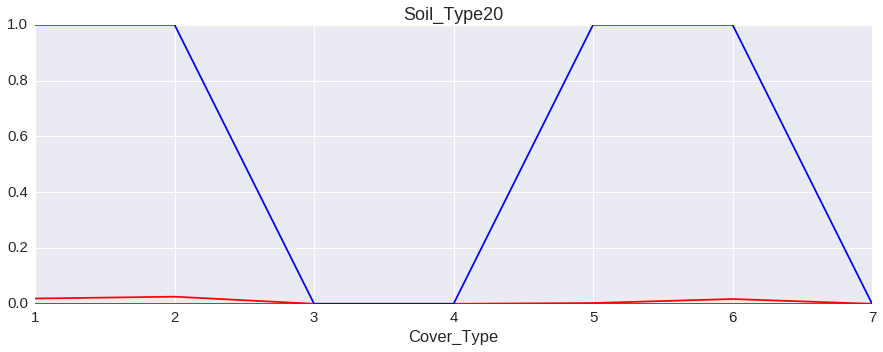

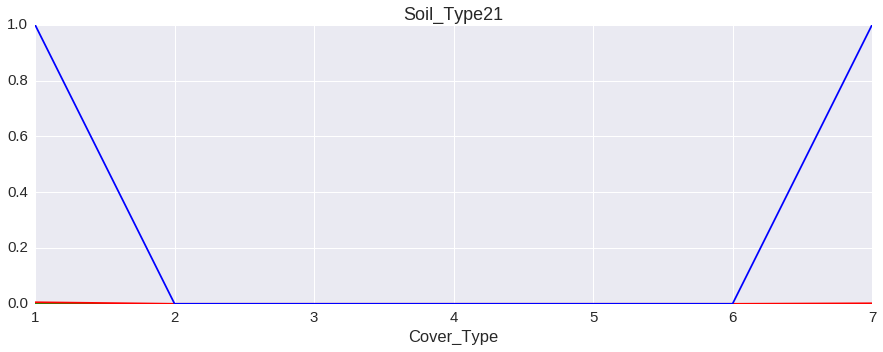

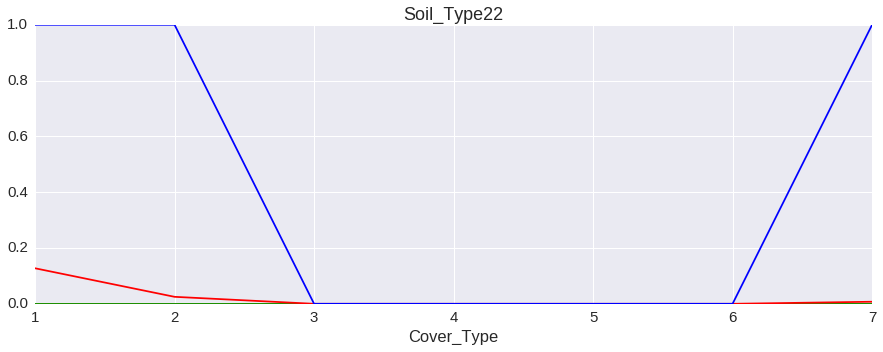

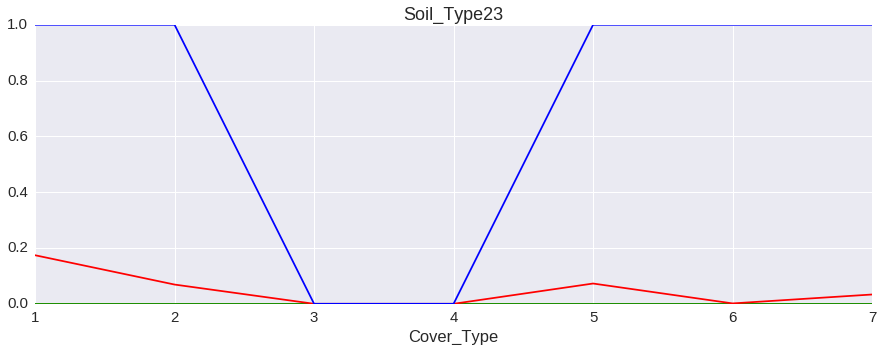

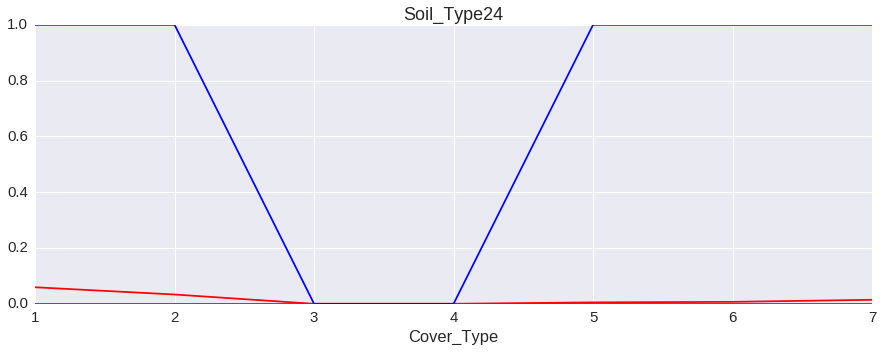

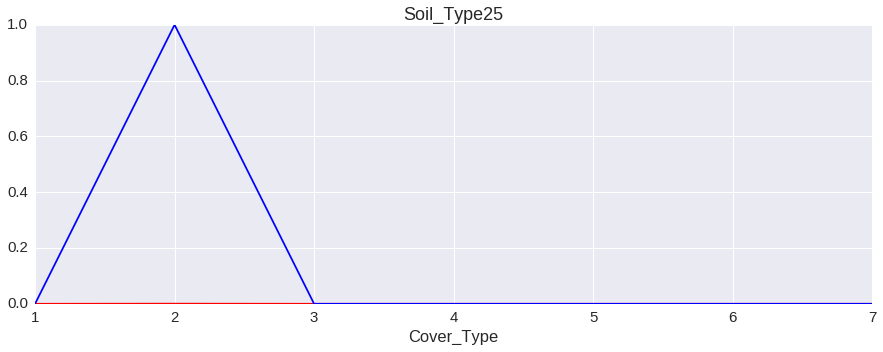

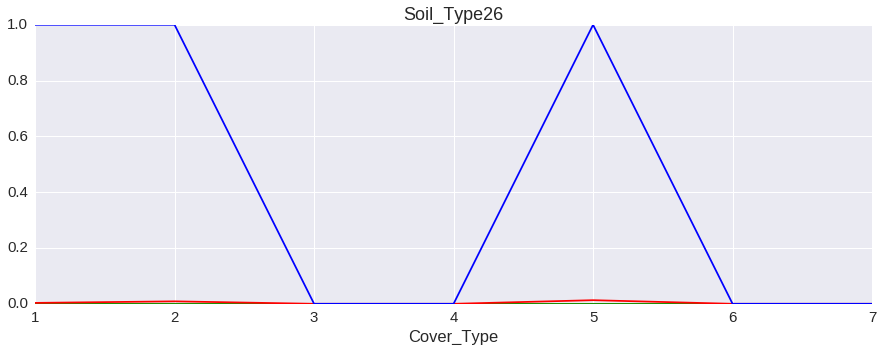

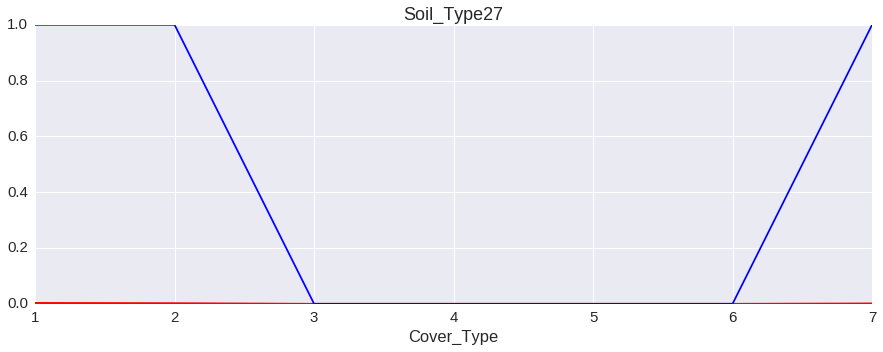

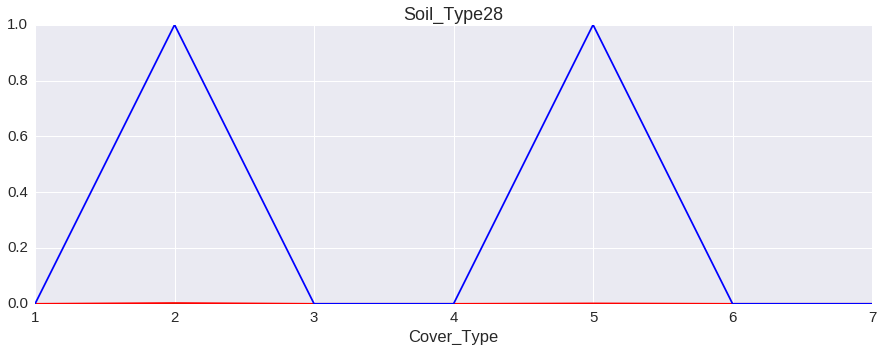

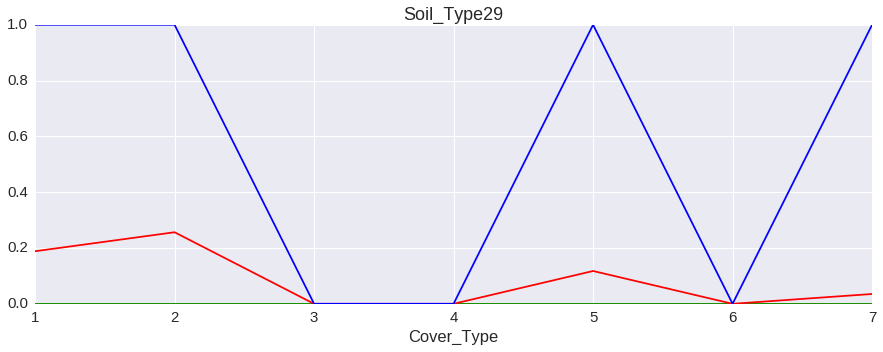

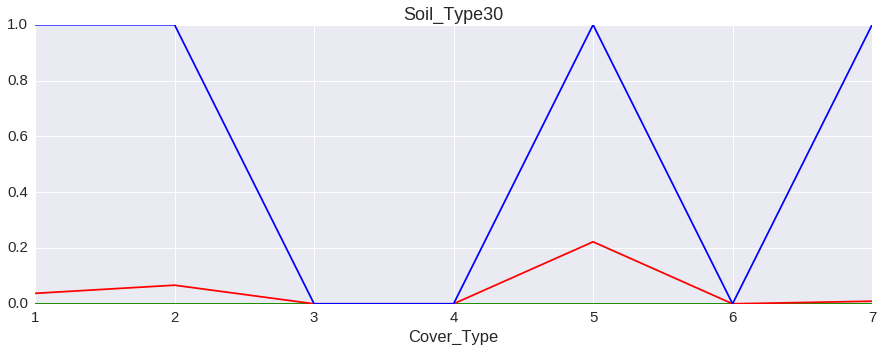

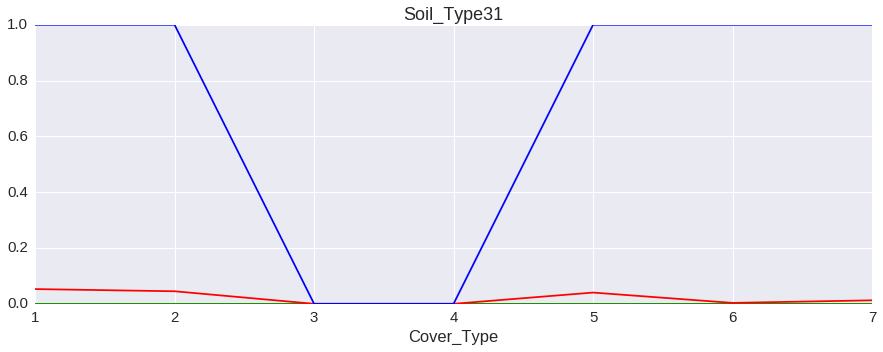

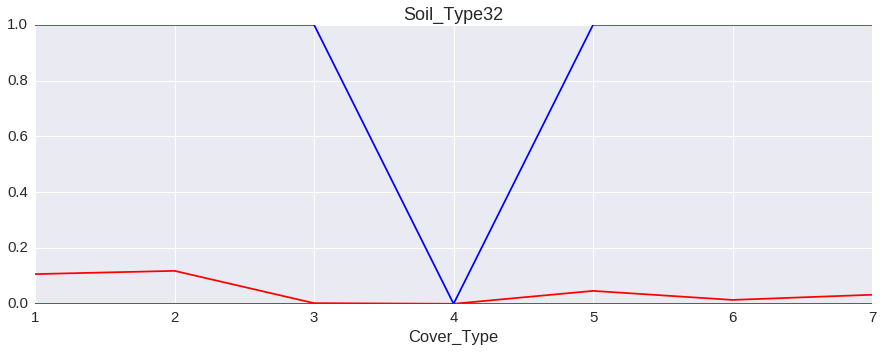

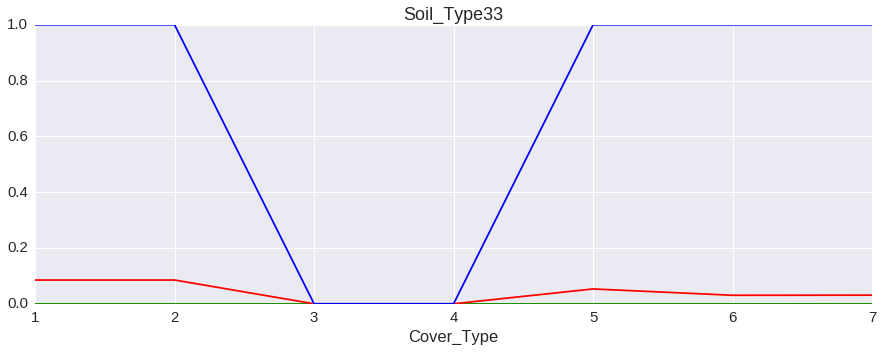

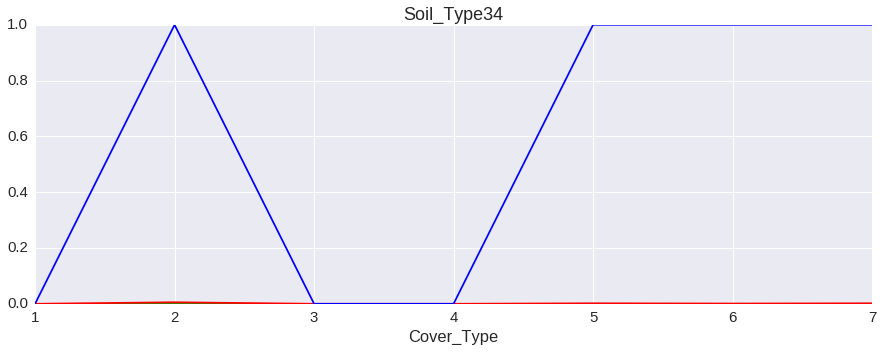

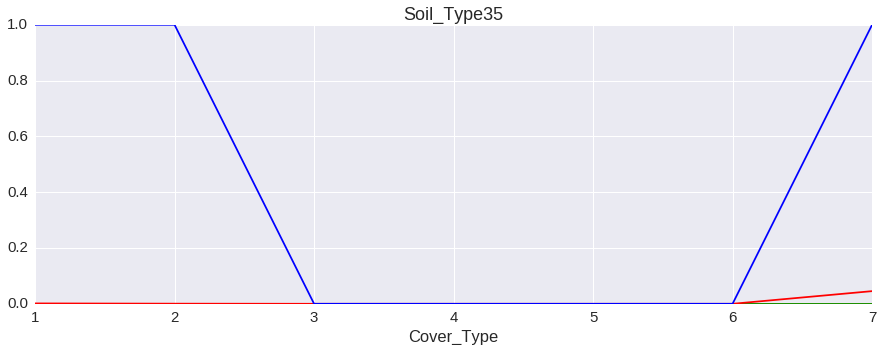

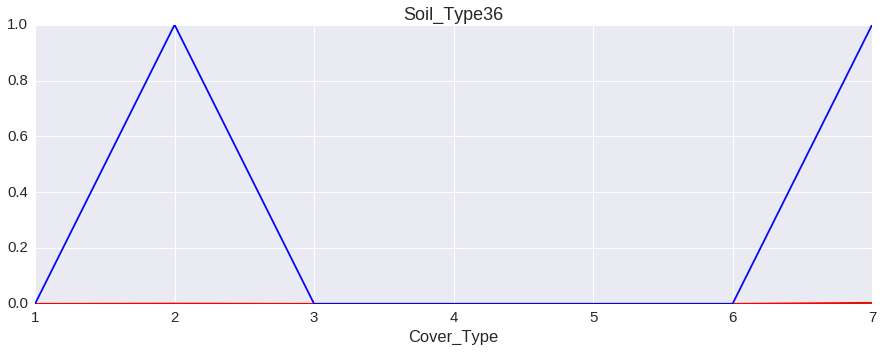

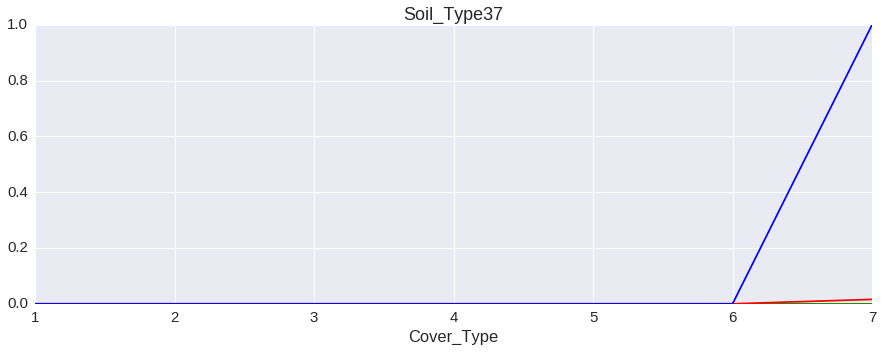

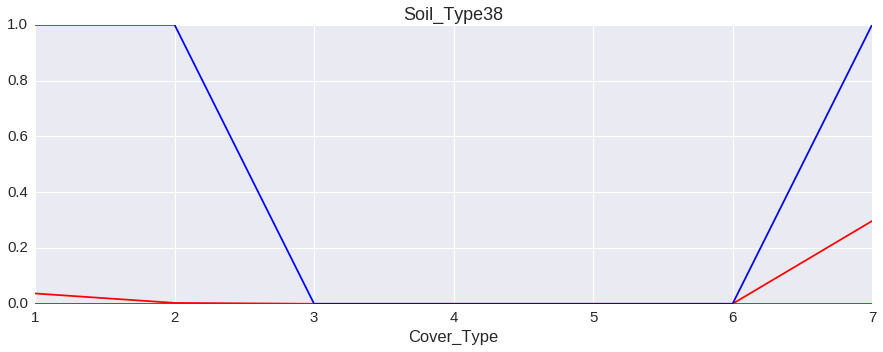

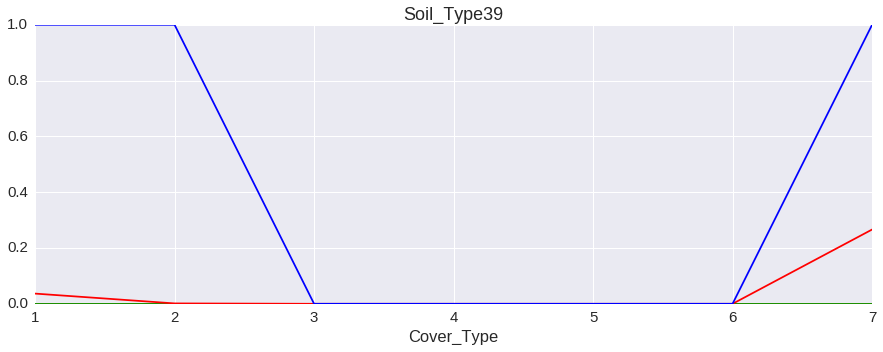

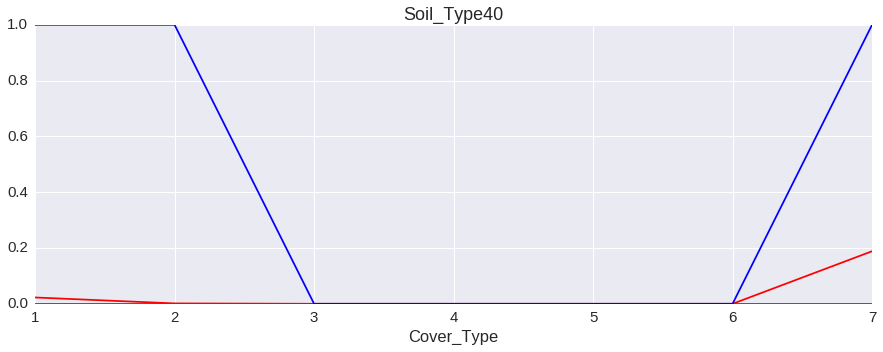

In [12]:
for i in min_df:
    min_df[i].plot(color='yellow', title=i)
    med_df[i].plot(color='green')
    mean_df[i].plot(color='red')
    max_df[i].plot(color='blue')
    plt.figure()

Soil_Type7 и Soil_Type15 всегда 0, то есть они бесполезны.  
В остальном, ничего полезного найти не удалось.

Проверим эффективность knn и random tree с помощью grid search.

In [61]:
X = df.iloc[:, 1:-1]
y = df['Cover_Type']

In [62]:
knn = KNeighborsClassifier()
k_range = range(1, 20)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

0.748611111111


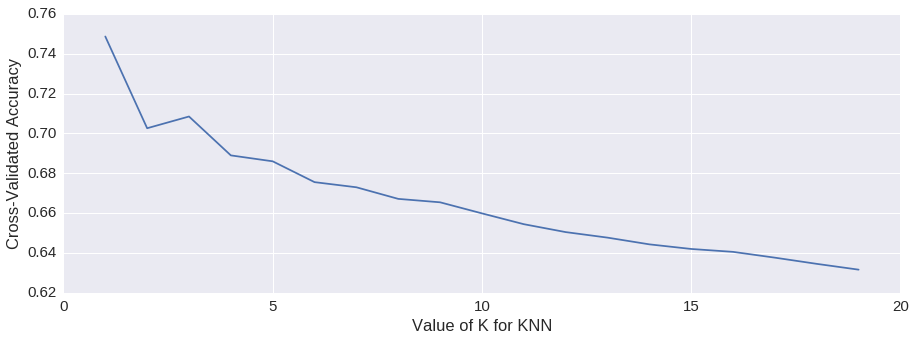

In [64]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
print max(grid_mean_scores)

In [65]:
clf = RandomForestClassifier()
k_range = range(1, 30)
param_grid = dict(n_estimators=k_range)
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

0.774603174603


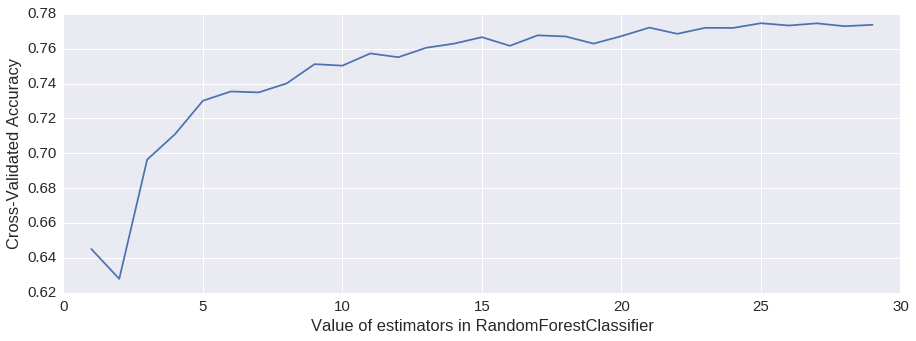

In [66]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of estimators in RandomForestClassifier')
plt.ylabel('Cross-Validated Accuracy')
print max(grid_mean_scores)

random forest оказался чуть лучше. 

Попробуем снизить размерность пространства, с помощью слияния столбцов Wilderness_Area(1-4) и Soil_Type(1-40).

In [19]:
def merge_cols(df, d):
    l = []
    for i in xrange(len(df)):
        if i % 50000 == 0:
            print i
        row = df.iloc[i, :]
        for key in d:
            if row[key] == 1:
                l.append(d[key])
                break
    return l

In [20]:
s = 'Wilderness_Area'
w_d = {s + str(i): i for i in xrange(1, 5)}
s = 'Soil_Type'
s_d = {s + str(i): i for i in xrange(1, 41)}

In [21]:
wilderness_area = merge_cols(df, w_d)

0


In [22]:
soil_type = merge_cols(df, s_d)

0


In [23]:
print soil_type[:10]

[29, 29, 12, 30, 29, 29, 29, 29, 29, 29]


In [71]:
df.ix[:10, 'Soil_Type1' :]

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [24]:
X = df.loc[:, 'Elevation':'Horizontal_Distance_To_Fire_Points']
X.insert(0, 'Wilderness_Area', wilderness_area)
X.insert(0, 'Soil_Type', soil_type)

In [25]:
X.head(5)

,Soil_Type,Wilderness_Area,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,29,1,2596,51,3,258,0,510,221,232,148,6279
1,29,1,2590,56,2,212,-6,390,220,235,151,6225
2,12,1,2804,139,9,268,65,3180,234,238,135,6121
3,30,1,2785,155,18,242,118,3090,238,238,122,6211
4,29,1,2595,45,2,153,-1,391,220,234,150,6172


Оцениваем с помощью gread search

In [74]:
knn = KNeighborsClassifier()
k_range = range(1, 20)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

0.748941798942


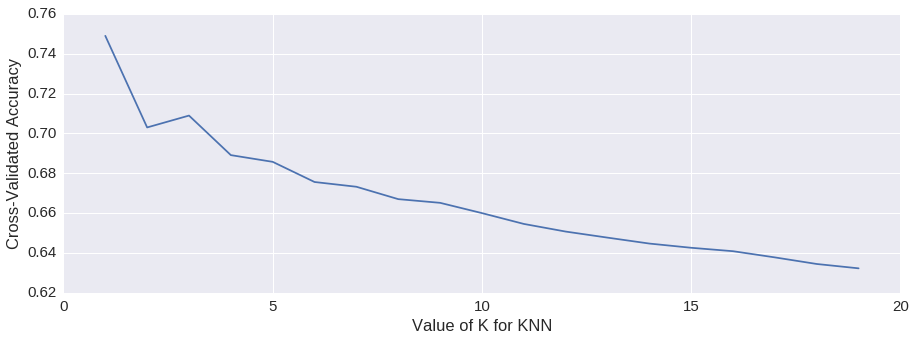

In [76]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
print max(grid_mean_scores)

In [77]:
clf = RandomForestClassifier()
k_range = range(1, 30)
param_grid = dict(n_estimators=k_range)
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

0.780621693122 {'n_estimators': 27}


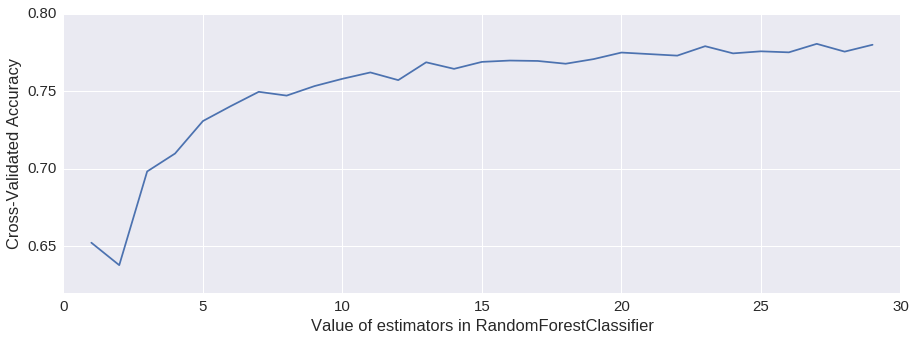

In [93]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of estimators in RandomForestClassifier')
plt.ylabel('Cross-Validated Accuracy')
print max(grid_mean_scores), grid.best_params_

* Точность увеличилась
* Для knn:           0.748611111111 => 0.748941798942
* Для random forest: 0.774603174603 => 0.780621693122

In [13]:
clf = RandomForestClassifier()
param_grid = {
          "n_estimators" : sp_randint(25, 35),
          "max_features": sp_randint(10,12),
          "min_samples_leaf": sp_randint(1,5),
          "min_samples_split": sp_randint(1,5),
          "bootstrap": [True, False],
          "criterion": ["gini", "entropy"],
          }

grid_search = RandomizedSearchCV(clf, n_iter=20, param_distributions=param_grid, n_jobs=-1)
grid_search.fit(X, y)
best_parameters = grid_search.best_params_

In [14]:
print best_parameters, grid_search.best_score_

{'bootstrap': True, 'min_samples_leaf': 2, 'n_estimators': 25, 'min_samples_split': 2, 'criterion': 'entropy', 'max_features': 10} 0.776785714286


In [16]:
clf = RandomForestClassifier(bootstrap=True, 
                             min_samples_leaf=2, 
                             min_samples_split=2,
                             criterion='entropy',
                             max_features=10)
k_range = range(25, 35)
param_grid = dict(n_estimators=k_range)
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [25, 26, 27, 28, 29, 30, 31, 32, 33, 34]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

0.774603174603 {'n_estimators': 27}


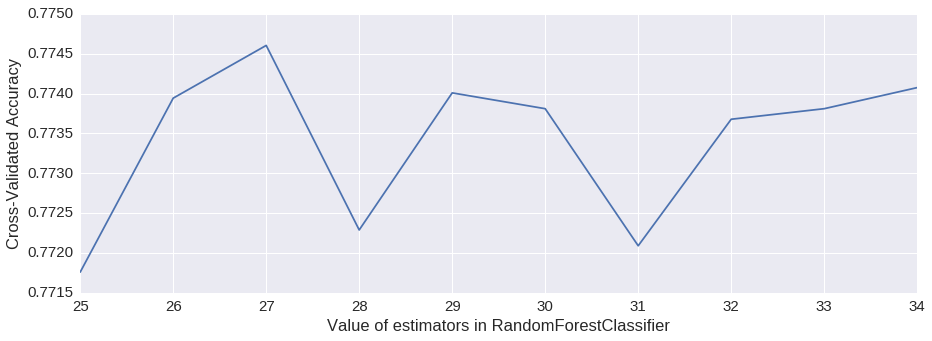

In [17]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of estimators in RandomForestClassifier')
plt.ylabel('Cross-Validated Accuracy')
print max(grid_mean_scores), grid.best_params_

Стало хуже.

Попробуем другие алгоритмы.

In [18]:
clf = DecisionTreeClassifier max_depth=None, min_samples_split=1, random_state=0)
scores = cross_val_score(clf, X, y)
scores.mean()

0.70006613756613756

In [20]:
clf = RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=1, random_state=0, n_jobs=-1)
scores = cross_val_score(clf, X, y)
scores.mean()   

0.78776455026455039

In [21]:
clf = ExtraTreesClassifier(n_estimators=500, max_depth=None, min_samples_split=1, random_state=0, n_jobs=-1)
scores = cross_val_score(clf, X, y)
scores.mean()

0.79074074074074074

In [22]:
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X, y)
scores.mean()

0.38432539682539685

In [23]:
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=1, random_state=0)
scores = cross_val_score(clf, X, y)
scores.mean()

0.61845238095238086

In [24]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print "Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label)

Accuracy: 0.58 (+/- 0.02) [Logistic Regression]
Accuracy: 0.76 (+/- 0.04) [Random Forest]
Accuracy: 0.60 (+/- 0.04) [naive Bayes]
Accuracy: 0.67 (+/- 0.03) [Ensemble]


Самыми лучшими оказались RandomForestClassifier и ExtraTreesClassifier. (может это переобучение?)

In [25]:
clf = ExtraTreesClassifier(max_depth=None, min_samples_split=1, random_state=0, n_jobs=-1)
k_range = range(1, 30)
param_grid = dict(n_estimators=k_range)
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=1,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

0.78578042328 {'n_estimators': 28}


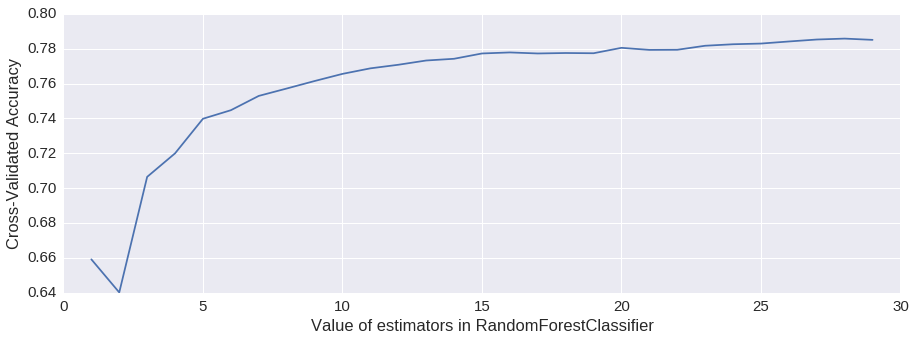

In [26]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of estimators in RandomForestClassifier')
plt.ylabel('Cross-Validated Accuracy')
print max(grid_mean_scores), grid.best_params_

С небольшим количеством оценщиков ExtraTreesClassifier показывает результат 0.78578042328 (n_estimators=28)  
против 0.780621693122 (n_estimators=27) у RandomForestClassifier.  
=> Используем ExtraTreesClassifier

In [15]:
test = pd.read_csv(test_file)

In [11]:
wilderness_area = merge_cols(test.loc[:, 'Wilderness_Area1': 'Wilderness_Area4'], w_d)

0
50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000


In [12]:
print wilderness_area[:10], len(wilderness_area)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 565892


In [22]:
with open(auxiliary_file, 'w') as outfile:
    outfile.write('Wilderness_Area\n')
    outfile.write(' '.join(map(str, wilderness_area)))
    outfile.write('\n')
    outfile.close()

In [19]:
soil_type = merge_cols(test.loc[:, 'Soil_Type1': 'Soil_Type40'], s_d)

0
50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000


In [20]:
print soil_type[:10], len(soil_type)

[29, 29, 29, 29, 29, 29, 29, 29, 29, 29] 565892


In [23]:
with open(auxiliary_file, 'a') as outfile:
    outfile.write('Soil_Type\n')
    outfile.write(' '.join(map(str, soil_type)))
    outfile.write('\n')
    outfile.close()

In [13]:
s = ''
with open(auxiliary_file, 'r') as infile:
    for line in infile:
        if line in ('Wilderness_Area\n', 'Soil_Type\n'):
            s = line[:-1]
            print s
            continue
        if s == 'Wilderness_Area':
            wilderness_area = list(map(int, line.split()))
            print 'W Done'
        elif s == 'Soil_Type':
            soil_type = list(map(int, line.split()))
            print 'S Done'

Wilderness_Area
W Done
Soil_Type
S Done


In [14]:
print len(wilderness_area), len(soil_type)

565892 565892


In [16]:
X_test = test.loc[:, 'Elevation':'Horizontal_Distance_To_Fire_Points']
X_test.insert(0, 'Wilderness_Area', wilderness_area)
X_test.insert(0, 'Soil_Type', soil_type)

In [17]:
X_test.head(5)

,Soil_Type,Wilderness_Area,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,29,1,2680,354,14,0,0,2684,196,214,156,6645
1,29,1,2683,0,13,0,0,2654,201,216,152,6675
2,29,1,2713,16,15,0,0,2980,206,208,137,6344
3,29,1,2709,24,17,0,0,2950,208,201,125,6374
4,29,1,2706,29,19,0,0,2920,210,195,115,6404


In [26]:
y = df['Cover_Type']
test_id = test['Id']
clf = ExtraTreesClassifier(n_estimators=500, max_depth=None, min_samples_split=1, random_state=0, n_jobs=-1)
clf.fit(X, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=1,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [27]:
del X, y, df, test

In [29]:
with open(submission_file, 'w') as outfile:
    n = 5000
    outfile.write('Id,Cover_Type\n')
    for i in xrange(0, len(X_test), n):
        predicted = clf.predict(X_test.iloc[i:i+n, :])
        for j, val in enumerate(predicted):                 
            outfile.write("%s,%s\n" % (test_id[i + j], val))
    outfile.close()